In [25]:
from datetime import datetime
import numpy as np
import scipy.io
import torch
import time
import os
import matplotlib.pyplot as plt
# Modules
from AC_precompute import inputs, gram_schmidt1, gram_schmidt2, gram_schmidt1_double, gram_schmidt2_double, gram_schmidt_basis,inputs_test,gram_schmidt_points,gram_schmidt_uni
from AC_test_adam import gpt_test, gpt_test_loss,gpt_test_loss_c
from AC_GPT_train import offline_generation,offline_generation_GD
from AC_SA_PINN import NN
from AC_SA_train import sa_pinn_train
from AC_models import P
from pyDOE import lhs


data_dir = "./ac_data_0102_nobic/"
if (os.path.exists(data_dir) == False):
    os.makedirs(data_dir)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Force CUDA initialization
dummy = torch.tensor([0.0]).to(device)

print(f"Current Device: {device}")
if torch.cuda.is_available():
    print(f"Current Device Name: {torch.cuda.get_device_name()}")

#device = torch.device("cuda")
print_seperator = 60*"*"

ac_test = np.loadtxt(data_dir + "/ac_test.dat")
pinn_test_soln = np.loadtxt(data_dir+"/test_pinn_soln.dat")

Current Device: cpu


In [36]:
params =  np.load(data_dir+"/params_gpt.npy", allow_pickle=True).item()

# 解包变量
device = params["device"]
xi, xf, ti, tf = params["domain"]["xi"], params["domain"]["xf"], params["domain"]["ti"], params["domain"]["tf"]
N_f = params["data sizes"]["N_f"]
xt_size = params["data sizes"]["N_test"]
BC_size = params["data sizes"]["BC_pts"]
IC_size = params["data sizes"]["N0"]
layers_pinn = params["layers pinn"]
lr_adam_sa = params["lr adam sa"]
lr_lbfgs_sa = params["lr lbfgs sa"]
epochs_adam_sa = params["epochs adam sa"]
epochs_lbfgs_sa = params["epochs lbfgs sa"]
parameter_size = params["parameter size"]
number_of_neurons = params["number of neurons"]
lr_gpt = params[f"lr gpt"]
epochs_gpt_train = params[f"epochs gpt train"]
test_cases = params["test cases"]
epochs_gpt_test = params[f"epochs gpt test"]
sparse = params["sparse"]


In [37]:
variables = torch.load(data_dir+"/variables_gpt.npy", map_location=torch.device('cpu'))

ac_test = variables["ac_test"]
c_initial = variables["c_initial"]
xt_size = variables["xt_size"]
IC_size = variables["IC_size"]
BC_size = variables["BC_size"]
IC_u = variables["IC_u"]
train_out = variables["train_out"]
train_out_xx = variables["train_out_xx"]
train_out_t = variables["train_out_t"]
train_out_IC = variables["train_out_IC"]
train_out_BC_ub = variables["train_out_BC_ub"]
train_out_BC_lb = variables["train_out_BC_lb"]
train_out_BC_ub_x = variables["train_out_BC_ub_x"]
train_out_BC_lb_x = variables["train_out_BC_lb_x"]
train_out_BC_diff = variables["train_out_BC_diff"]
train_out_BC_diff_x = variables["train_out_BC_diff_x"]
fhat = variables["fhat"]
epochs_gpt_test = variables["epochs_gpt_test"]
lr_gpt = variables["lr_gpt"]
neurons = variables["neurons"]
out_test = variables["out_test"]

In [38]:
print(f"GPT-PINN Testing Started")
test_gpt_time, test_gpt_soln = gpt_test(ac_test, train_out, train_out_t, train_out_xx, 
train_out_IC, fhat, xt_size, IC_size, BC_size, IC_u, c_initial, epochs_gpt_test, 
lr_gpt, out_test, train_out_BC_ub, train_out_BC_lb, train_out_BC_diff, 
train_out_BC_ub_x, train_out_BC_lb_x, train_out_BC_diff_x)

test_gpt_losses = gpt_test_loss(ac_test, train_out, train_out_t, train_out_xx, 
train_out_IC, fhat, xt_size, IC_size, BC_size, IC_u, c_initial, epochs_gpt_test, 
lr_gpt, out_test, train_out_BC_ub, train_out_BC_lb, train_out_BC_diff, 
train_out_BC_ub_x, train_out_BC_lb_x, train_out_BC_diff_x)
print(f"GPT-PINN Testing Ended")

GPT-PINN Testing Started
GPT-PINN Testing Ended


In [29]:
params =  np.load(data_dir+"/params_sgpt.npy", allow_pickle=True).item()

# 解包变量
device = params["device"]
xi, xf, ti, tf = params["domain"]["xi"], params["domain"]["xf"], params["domain"]["ti"], params["domain"]["tf"]
N_f = params["data sizes"]["N_f"]
xt_size = params["data sizes"]["N_test"]
BC_size = params["data sizes"]["BC_pts"]
IC_size = params["data sizes"]["N0"]
layers_pinn = params["layers pinn"]
lr_adam_sa = params["lr adam sa"]
lr_lbfgs_sa = params["lr lbfgs sa"]
epochs_adam_sa = params["epochs adam sa"]
epochs_lbfgs_sa = params["epochs lbfgs sa"]
parameter_size = params["parameter size"]
number_of_neurons = params["number of neurons"]
lr_gpt = params[f"lr sgpt"]
epochs_gpt_train = params[f"epochs sgpt train"]
test_cases = params["test cases"]
epochs_gpt_test = params[f"epochs sgpt test"]
sparse = params["sparse"]

In [30]:
variables = torch.load(data_dir+"/variables_sgpt.npy", map_location=torch.device('cpu'))

ac_test = variables["ac_test"]
c_initial = variables["c_initial"]
train_len = variables["train_len"]
xt_size = variables["xt_size"]
IC_size = variables["IC_size"]
BC_size = variables["BC_size"]
IC_u = variables["IC_u"]
train_out = variables["train_out"]
train_out_xx = variables["train_out_xx"]
train_out_t = variables["train_out_t"]
train_out_IC = variables["train_out_IC"]
train_out_BC_ub = variables["train_out_BC_ub"]
train_out_BC_lb = variables["train_out_BC_lb"]
train_out_BC_ub_x = variables["train_out_BC_ub_x"]
train_out_BC_lb_x = variables["train_out_BC_lb_x"]
train_out_BC_diff = variables["train_out_BC_diff"]
train_out_BC_diff_x = variables["train_out_BC_diff_x"]
fhat = variables["fhat"]
epochs_gpt_test = variables["epochs_gpt_test"]
lr_gpt = variables["lr_gpt"]
neurons = variables["neurons"]
out_test = variables["out_test"]

In [31]:
test_sgpt_time, test_sgpt_soln = gpt_test(ac_test, train_out, train_out_t, train_out_xx, 
train_out_IC, fhat, train_len, IC_size, BC_size, IC_u, c_initial, epochs_gpt_test, 
lr_gpt, out_test, train_out_BC_ub, train_out_BC_lb, train_out_BC_diff, 
train_out_BC_ub_x, train_out_BC_lb_x, train_out_BC_diff_x)

test_sgpt_losses = gpt_test_loss(ac_test, train_out, train_out_t, train_out_xx, 
train_out_IC, fhat, train_len, IC_size, BC_size, IC_u, c_initial, epochs_gpt_test, 
lr_gpt, out_test, train_out_BC_ub, train_out_BC_lb, train_out_BC_diff, 
train_out_BC_ub_x, train_out_BC_lb_x, train_out_BC_diff_x)

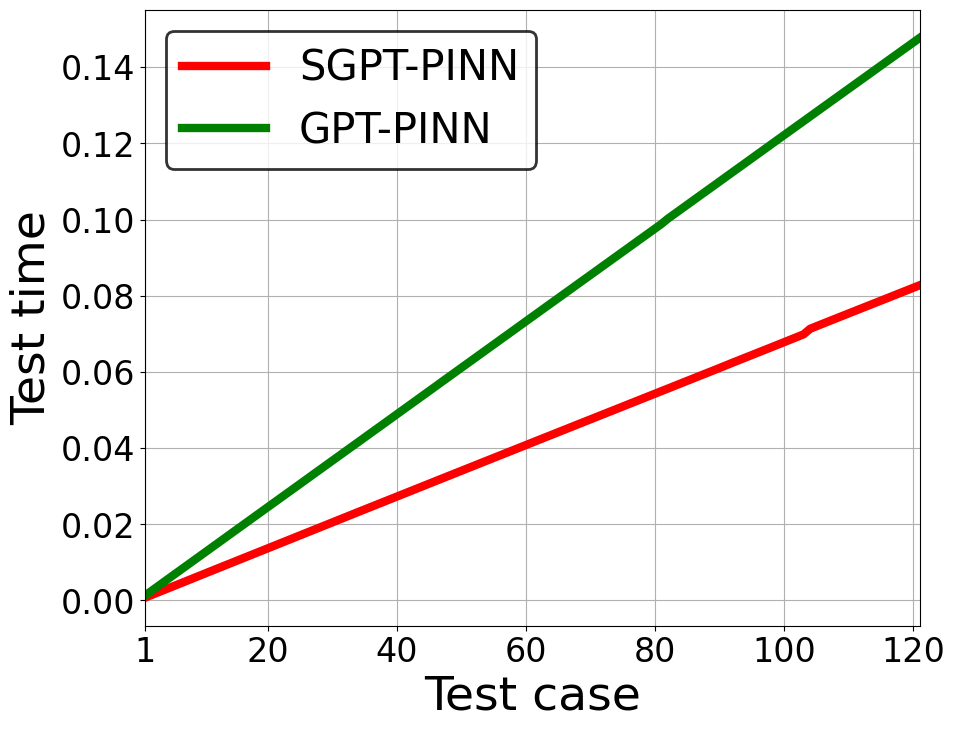

In [39]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
x_plt16 = range(1,test_sgpt_time.shape[0]+1) 
x_ticks = list(range(0,test_sgpt_time.shape[0]+1,20))
x_ticks[0] = 1
ax.plot(x_plt16, test_sgpt_time, color="red",   label="SGPT-PINN", lw=6)
ax.plot(x_plt16, test_gpt_time,  color="green", label="GPT-PINN",  lw=6)
ax.set_xticks(ticks=x_ticks)
ax.set_xlim(min(x_plt16),max(x_plt16))
ax.set_xlabel("Test case", fontsize=34)
ax.set_ylabel("Test time", fontsize=34)
legend = ax.legend(frameon=True, fontsize=30)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('k')
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()
#plt.yscale('log')
plt.show()

In [40]:
np.savetxt(data_dir+f"/test_gpt_losses.dat", test_gpt_losses)
np.savetxt(data_dir+f"/test_gpt_soln.dat",   test_gpt_soln)
np.savetxt(data_dir+f"/test_gpt_time.dat",   test_gpt_time)

np.savetxt(data_dir+f"/test_bic_sgpt_losses.dat", test_sgpt_losses)
np.savetxt(data_dir+f"/test_bic_sgpt_soln.dat",   test_sgpt_soln)
np.savetxt(data_dir+f"/test_bic_sgpt_time.dat",   test_sgpt_time)